# Gradient Descent - Lab

## Introduction

In this lab, you'll continue to formalize your knowledge of gradient descent by coding the algorithm yourself. In the upcoming labs, you'll apply similar procedures to implement logistic regression on your own.


## Objectives

In this lab you will: 


- Implement gradient descent from scratch to minimize OLS


## Use gradient descent to minimize OLS

To practice gradient descent, you'll investigate a simple regression case in which you're looking to minimize the Residual Sum of Squares (RSS) between the predictions and the actual values. Remember that this is referred to as Ordinary Least Squares (OLS) regression. You'll compare two simplistic models and use gradient descent to improve upon these initial models.


## Load the dataset

- Import the file `'movie_data.xlsx'` using Pandas 
- Print the first five rows of the data 

> You can use the `read_excel()` function to import an Excel file. 

In [2]:
# Import the data
import pandas as pd
df = pd.read_excel('movie_data.xlsx')

# Print the first five rows of the data
df.head()

,budget,domgross,title
0,13000000,25682380,21 &amp; Over
1,45658735,13414714,Dredd 3D
2,20000000,53107035,12 Years a Slave
3,61000000,75612460,2 Guns
4,40000000,95020213,42


## Two simplistic models

Imagine someone is attempting to predict the domestic gross sales of a movie based on the movie's budget, or at least further investigate how these two quantities are related. Two models are suggested and need to be compared.  
The two models are:  

$\text{domgross} = 1.575 \cdot \text{budget}$  
$\text{domgross} = 1.331 \cdot \text{budget}$  


Here's a graph of the two models along with the actual data:

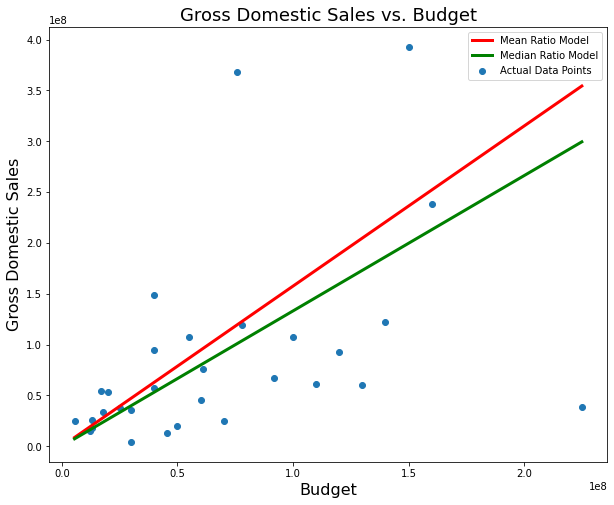

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(10,8))
x = np.linspace(start=df['budget'].min(), stop=df['budget'].max(), num=10**5)
plt.plot(x, 1.575*x, label='Mean Ratio Model', color='red', lw=3) # Model 1
plt.plot(x, 1.331*x, label='Median Ratio Model', color = 'green', lw=3) # Model 2
plt.scatter(df['budget'], df['domgross'], label='Actual Data Points')
plt.title('Gross Domestic Sales vs. Budget', fontsize=18)
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Gross Domestic Sales', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Error/Loss functions

To compare the two models (and future ones), a metric for evaluating and comparing models to each other is needed. Traditionally, this is the residual sum of squares. As such you are looking to minimize  $ \sum(\hat{y}-y)^2$.
Write a function `rss()` which calculates the residual sum of squares for a simplistic model: 

$\text{domgross} = m \cdot \text{budget}$ 

In [4]:
def rss(m, X=df['budget'], y=df['domgross']):
    y_hat = m * X
    result = np.sum((y_hat - y)**2)
    return result

## Find the RSS for the two models
Which of the two models is better?

In [5]:
# Your code here
print(f'The RSS for m=1.575 is {round(rss(1.575),4)}')

print(f'The RSS for m=1.331 is {rss(1.331)}')

The RSS for m=1.575 is 2.7614512142376128e+17
The RSS for m=1.331 is 2.3547212057814554e+17


In [6]:
# Your response here
# Second model with m=1.331 is slightly better with a lower RSS

## Gradient descent

Now that you have a loss function, you can use numerical methods to find a minimum to the loss function. By minimizing the loss function, you have achieved an optimal solution according to the problem formulation. Here's the outline of gradient descent from the previous lesson:  

1. Define initial parameters:
    1. pick a starting point
    2. pick a step size $\alpha$ (alpha)
    3. choose a maximum number of iterations; the algorithm will terminate after this many iterations if a minimum has yet to be found
    4. (optionally) define a precision parameter; similar to the maximum number of iterations, this will terminate the algorithm early. For example, one might define a precision parameter of 0.00001, in which case if the change in the loss function were less than 0.00001, the algorithm would terminate. The idea is that we are very close to the bottom and further iterations would make a negligible difference 
2. Calculate the gradient at the current point (initially, the starting point)
3. Take a step (of size alpha) in the direction of the gradient
4. Repeat steps 2 and 3 until the maximum number of iterations is met, or the difference between two points is less then your precision parameter  

To start, visualize the cost function. Plot the cost function output for a range of m values from -3 to 5.

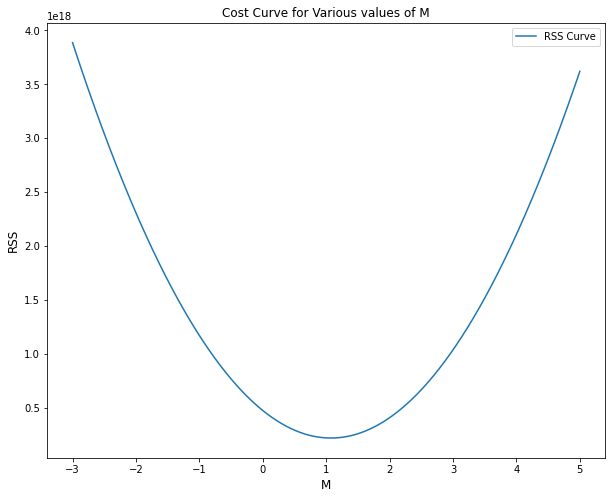

In [7]:
# Your code here
plt.figure(figsize=(10,8))
m = np.linspace(-3, 5, num=10**4)
y = [rss(i) for i in m]
plt.plot(m, y, label='RSS Curve')
plt.title ('Cost Curve for Various values of M')
plt.xlabel('M', fontsize=12)
plt.ylabel('RSS', fontsize=12)
plt.legend();

As you can see, this is a simple cost function. The minimum is clearly around 1. With that, it's time to implement gradient descent in order to find the optimal value for m.

In [20]:
# Set a starting point
# don't pick a random point - look at the curve where is M near the minima? Somewhere around 1
# so pick a value around 1
cur_x = 1.2

# Initialize a step size
# don't take a bigger step than the precision you require
alpha = 0.0000001 

# Initialize a precision
precision = 0.0000001 

# Helpful initialization
previous_step_size = 1 

# Maximum number of iterations
max_iters = 10000

# Iteration counter
iters = 0 

# Create a loop to iterate through the algorithm until either the max_iteration or precision conditions is met
# Your code here; create a loop as described above
while (iters < max_iters) and (previous_step_size > precision):
    
    # printing out the progress is a good idea for using the while loop
    print('Current M:{}, RSS:{}'.format(cur_x,rss(cur_x)))
    
    # initialise what the x is at the moment because you will need to update cur_x later.
    prev_x = cur_x
    
    # the following line generates the x values required to plot the gradient, the x values which describe the horizontal line
    x_survey_region = np.linspace(start = cur_x - previous_step_size , stop = cur_x + previous_step_size , num = 101)
    
    # given that rss is the y axis, this generates a list of points which corresponds to the x values above
    # hence this generates the y values required to plot the gradient, the y values which describe the vertical line
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
    
    # the np gradient will generate an array of gradients. We want number 50 in the list because that is in the "middle" of our line
    # number 50 is in the middle because there are 101 x values when describing the x values and 101 y values were generated
    gradient = np.gradient(rss_survey_region)[50]
    
    # Update the current x, by taking an "alpha sized" step in the direction of the gradient
    cur_x -= alpha * gradient
    
    # this shows how big a step you took
    previous_step_size = abs(cur_x - prev_x)
    
    # Update the iteration number
    iters += 1
# The output for the above will be: ('The local minimum occurs at', 1.1124498053361267)    
print("The local minimum occurs at", cur_x)

Current M:1.2, RSS:2.2447383379785802e+17
Current M:1.083822808151272, RSS:2.2105570433558058e+17
Current M:1.0828864259707391, RSS:2.210523493467156e+17
Current M:1.0828797016126663, RSS:2.2105232665302048e+17
The local minimum occurs at 1.0828796533660712


## Plot the minimum on your graph
Replot the RSS cost curve as above. Add a red dot for the minimum of this graph using the solution from your gradient descent function above.

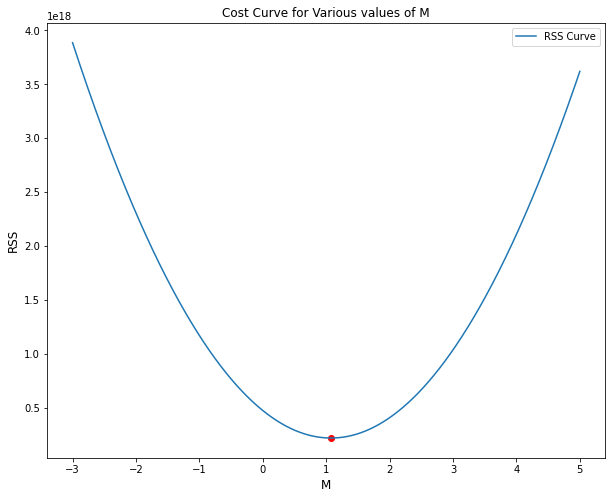

In [22]:
# Your code here
plt.figure(figsize=(10,8))
m = np.linspace(-3, 5, num=10**4)
y = [rss(i) for i in m]
x=1.0828796533660712
plt.plot(m, y, label='RSS Curve')
plt.scatter(x ,y=rss(x), c='red')
plt.title ('Cost Curve for Various values of M')
plt.xlabel('M', fontsize=12)
plt.ylabel('RSS', fontsize=12)
plt.legend();

## Summary 

In this lab, you coded up a gradient descent algorithm from scratch! In the next lab, you'll apply this to logistic regression in order to create a full implementation yourself!